# Exploratory Data Analysis: Solar Activity & Geomagnetic Indices

Dieses Notebook führt eine explorative Datenanalyse (EDA) durch, um die Zusammenhänge zwischen Sonnenaktivität und geomagnetischen Indizes zu untersuchen.


## 1. Imports und Daten laden


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Styling
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

# Lade Master-Dataset
master = pd.read_csv("../data/processed/master_monthly_merged.csv")
master["date"] = pd.to_datetime(master["date"])

print(f"Dataset Shape: {master.shape}")
print(f"Zeitraum: {master['date'].min()} bis {master['date'].max()}")
print(f"\nSpalten: {list(master.columns)}")
master.head()


Dataset Shape: (251, 14)
Zeitraum: 2004-10-01 00:00:00 bis 2025-08-01 00:00:00

Spalten: ['date', 'sn', 'sn_std', 'n_obs', 'fluxadjflux', 'fluxursi', 'kp', 'ap', 'sn_lag_1m', 'sn_lag_3m', 'sn_lag_6m', 'f107_lag_1m', 'f107_lag_3m', 'f107_lag_6m']


,date,sn,sn_std,n_obs,fluxadjflux,fluxursi,kp,ap,sn_lag_1m,sn_lag_3m,sn_lag_6m,f107_lag_1m,f107_lag_3m,f107_lag_6m
0,2004-10-01,53.411765,4.070588,299,134.916667,121.425000,1.650536,8.100806,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-11-01,70.000000,4.684615,211,113.677778,102.312222,2.541650,24.625000,53.411765,NaN,NaN,134.916667,NaN,NaN
2,2004-12-01,26.666667,3.258333,164,92.758974,83.479487,2.151851,10.907258,70.000000,NaN,NaN,113.677778,NaN,NaN
3,2005-01-01,45.250000,4.300000,134,99.586022,89.627957,3.001331,23.673387,26.666667,53.411765,NaN,92.758974,134.916667,NaN
4,2005-02-01,36.625000,3.025000,130,94.947619,85.447619,2.072893,11.290179,45.250000,70.000000,NaN,99.586022,113.677778,NaN


## 2. Datenübersicht


In [ ]:
master.describe()


,date,sn,sn_std,n_obs,fluxadjflux,fluxursi,kp,ap,sn_lag_1m,sn_lag_3m,sn_lag_6m,f107_lag_1m,f107_lag_3m,f107_lag_6m
count,251,251.000000,251.000000,251.000000,251.000000,251.000000,194.000000,194.000000,250.000000,248.000000,245.000000,250.000000,248.000000,245.000000
mean,2015-03-02 07:27:29.402390528,53.907347,6.156492,388.123506,103.285256,92.961572,1.595454,8.359315,53.567262,53.060009,52.334369,103.058814,102.769891,102.135691
min,2004-10-01 00:00:00,0.000000,0.000000,117.000000,66.893333,60.202222,0.444859,1.915323,0.000000,0.000000,0.000000,66.893333,66.893333,66.893333
25%,2009-12-16 12:00:00,11.029412,2.269910,261.000000,73.200287,65.878871,1.278550,5.791028,11.014706,10.732143,9.928571,73.075699,72.947473,72.936559
50%,2015-03-01 00:00:00,39.866667,4.200000,342.000000,88.367222,79.526111,1.573925,7.889113,39.850000,38.666667,36.705882,88.234722,88.056487,87.646237
75%,2020-05-16 12:00:00,90.625874,7.082807,507.500000,126.944982,114.251631,1.883787,9.909166,89.477273,88.750000,88.333333,126.150595,125.715179,124.696667
max,2025-08-01 00:00:00,208.545455,30.406250,981.000000,251.567204,226.409140,3.001331,24.625000,208.545455,208.545455,208.545455,251.567204,251.567204,251.567204
std,NaN,48.052646,5.972680,172.334363,36.346970,32.709505,0.452313,3.649671,47.845412,47.699469,47.446664,36.242047,36.243021,35.981648


In [ ]:
print("Fehlende Werte:")
print(master.isnull().sum())


Fehlende Werte:
date            0
sn              0
sn_std          0
n_obs           0
fluxadjflux     0
fluxursi        0
kp             57
ap             57
sn_lag_1m       1
sn_lag_3m       3
sn_lag_6m       6
f107_lag_1m     1
f107_lag_3m     3
f107_lag_6m     6
dtype: int64


## 3. Korrelationsanalyse


Korrelationsmatrix:
                sn  fluxadjflux     kp     ap
sn           1.000        0.967  0.324  0.296
fluxadjflux  0.967        1.000  0.340  0.308
kp           0.324        0.340  1.000  0.944
ap           0.296        0.308  0.944  1.000


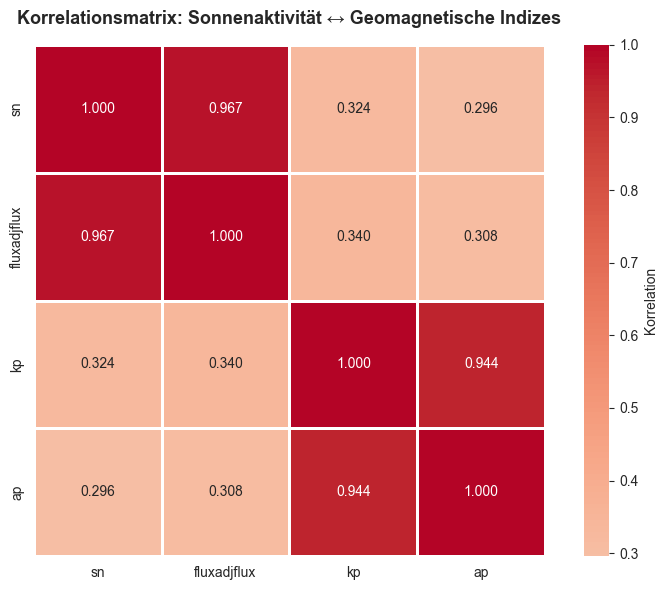

In [ ]:
# Pearson-Korrelationen
corr_vars = ["sn", "fluxadjflux", "kp", "ap"]
corr_matrix = master[corr_vars].corr()

print("Korrelationsmatrix:")
print(corr_matrix.round(3))


## 4. Visualisierungen

### 4.1 Zeitreihen aller Variablen (11-Jahres-Zyklus)


In [ ]:
# Plot 1: Zeitreihen aller Variablen (11-Jahres-Zyklus)
fig, axes = plt.subplots(4, 1, figsize=(16, 12), sharex=True)

# Sunspots
axes[0].plot(master["date"], master["sn"], color="tab:blue", linewidth=1.5, alpha=0.8)
axes[0].set_ylabel("Sunspot Number", fontsize=12, fontweight="bold")
axes[0].set_title("Zeitreihen der Sonnenaktivität und geomagnetischen Indizes", 
                  fontsize=14, fontweight="bold", pad=20)
axes[0].grid(True, alpha=0.3)

# F10.7
axes[1].plot(master["date"], master["fluxadjflux"], color="tab:orange", linewidth=1.5, alpha=0.8)
axes[1].set_ylabel("F10.7 (adjusted)", fontsize=12, fontweight="bold")
axes[1].grid(True, alpha=0.3)

# Kp-Index
axes[2].plot(master["date"], master["kp"], color="tab:red", linewidth=1.5, alpha=0.8)
axes[2].set_ylabel("Kp Index", fontsize=12, fontweight="bold")
axes[2].grid(True, alpha=0.3)

# Ap-Index
axes[3].plot(master["date"], master["ap"], color="tab:green", linewidth=1.5, alpha=0.8)
axes[3].set_ylabel("Ap Index", fontsize=12, fontweight="bold")
axes[3].set_xlabel("Jahr", fontsize=12, fontweight="bold")
axes[3].grid(True, alpha=0.3)

# Formatierung der x-Achse
for ax in axes:
    ax.tick_params(labelsize=10)
    # Zeige alle 5 Jahre auf x-Achse
    years = pd.date_range(start=master["date"].min(), end=master["date"].max(), freq="5YS")
    ax.set_xticks(years)
    ax.set_xticklabels([y.strftime("%Y") for y in years], rotation=45, ha="right")

plt.tight_layout()
plt.show()


### 4.2 Scatterplots - Korrelationen zwischen Variablen


In [ ]:
# Plot 2: Scatterplots - Korrelationen zwischen Variablen
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Sunspots vs F10.7
axes[0, 0].scatter(master["sn"], master["fluxadjflux"], alpha=0.5, s=20, color="tab:blue")
axes[0, 0].set_xlabel("Sunspot Number", fontsize=11, fontweight="bold")
axes[0, 0].set_ylabel("F10.7 (adjusted)", fontsize=11, fontweight="bold")
axes[0, 0].set_title("Sunspots ↔ F10.7", fontsize=12, fontweight="bold")
corr_sn_f107 = master[["sn", "fluxadjflux"]].corr().iloc[0, 1]
axes[0, 0].text(0.05, 0.95, f"r = {corr_sn_f107:.3f}", 
                transform=axes[0, 0].transAxes, fontsize=10,
                verticalalignment="top", bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))
axes[0, 0].grid(True, alpha=0.3)

# Sunspots vs Kp
axes[0, 1].scatter(master["sn"], master["kp"], alpha=0.5, s=20, color="tab:red")
axes[0, 1].set_xlabel("Sunspot Number", fontsize=11, fontweight="bold")
axes[0, 1].set_ylabel("Kp Index", fontsize=11, fontweight="bold")
axes[0, 1].set_title("Sunspots ↔ Kp", fontsize=12, fontweight="bold")
corr_sn_kp = master[["sn", "kp"]].corr().iloc[0, 1]
axes[0, 1].text(0.05, 0.95, f"r = {corr_sn_kp:.3f}", 
                transform=axes[0, 1].transAxes, fontsize=10,
                verticalalignment="top", bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))
axes[0, 1].grid(True, alpha=0.3)

# F10.7 vs Kp
axes[1, 0].scatter(master["fluxadjflux"], master["kp"], alpha=0.5, s=20, color="tab:orange")
axes[1, 0].set_xlabel("F10.7 (adjusted)", fontsize=11, fontweight="bold")
axes[1, 0].set_ylabel("Kp Index", fontsize=11, fontweight="bold")
axes[1, 0].set_title("F10.7 ↔ Kp", fontsize=12, fontweight="bold")
corr_f107_kp = master[["fluxadjflux", "kp"]].corr().iloc[0, 1]
axes[1, 0].text(0.05, 0.95, f"r = {corr_f107_kp:.3f}", 
                transform=axes[1, 0].transAxes, fontsize=10,
                verticalalignment="top", bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))
axes[1, 0].grid(True, alpha=0.3)

# F10.7 vs Ap
axes[1, 1].scatter(master["fluxadjflux"], master["ap"], alpha=0.5, s=20, color="tab:green")
axes[1, 1].set_xlabel("F10.7 (adjusted)", fontsize=11, fontweight="bold")
axes[1, 1].set_ylabel("Ap Index", fontsize=11, fontweight="bold")
axes[1, 1].set_title("F10.7 ↔ Ap", fontsize=12, fontweight="bold")
corr_f107_ap = master[["fluxadjflux", "ap"]].corr().iloc[0, 1]
axes[1, 1].text(0.05, 0.95, f"r = {corr_f107_ap:.3f}", 
                transform=axes[1, 1].transAxes, fontsize=10,
                verticalalignment="top", bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle("Korrelationsanalyse: Sonnenaktivität ↔ Geomagnetische Indizes", 
             fontsize=14, fontweight="bold", y=0.995)
plt.tight_layout()
plt.show()


### 4.3 Korrelationsmatrix (Heatmap)


In [ ]:
# Plot 3: Korrelationsmatrix (Heatmap)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap="coolwarm", center=0,
            square=True, linewidths=1, cbar_kws={"label": "Korrelation"})
ax.set_title("Korrelationsmatrix: Sonnenaktivität und geomagnetische Indizes", 
             fontsize=13, fontweight="bold", pad=15)
plt.tight_layout()
plt.show()


### 4.4 Lag-Korrelationen (Vorhersagekraft)


In [ ]:
# Plot 4: Lag-Korrelationen (wie gut können Sonnenflecken/F10.7 Kp vorhersagen?)
lag_vars_kp = ["sn_lag_1m", "sn_lag_3m", "sn_lag_6m", "f107_lag_1m", "f107_lag_3m", "f107_lag_6m"]
lag_data = master[["kp"] + lag_vars_kp].dropna()

if len(lag_data) > 0:
    lag_corrs = lag_data.corr()["kp"].drop("kp").sort_values(ascending=False)
    
    print("Korrelationen mit Lag-Features (Kp):")
    print(lag_corrs.round(3))
    
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ["tab:blue" if "sn" in var else "tab:orange" for var in lag_corrs.index]
    bars = ax.barh(lag_corrs.index, lag_corrs.values, color=colors, alpha=0.7)
    ax.axvline(x=0, color="black", linestyle="--", linewidth=1)
    ax.set_xlabel("Korrelation mit Kp-Index", fontsize=12, fontweight="bold")
    ax.set_title("Vorhersagekraft: Lag-Features für Kp-Index", fontsize=13, fontweight="bold", pad=15)
    ax.grid(True, alpha=0.3, axis="x")
    
    # Werte auf Bars anzeigen
    for i, (bar, val) in enumerate(zip(bars, lag_corrs.values)):
        ax.text(val + 0.01 if val >= 0 else val - 0.01, i, f"{val:.3f}",
                va="center", ha="left" if val >= 0 else "right", fontsize=10)
    
    plt.tight_layout()
    plt.show()
else:
    print("Keine Daten für Lag-Analyse verfügbar")


## 5. Interpretation und Zusammenfassung


In [ ]:
print("="*60)
print("ZUSAMMENFASSUNG DER ERGEBNISSE")
print("="*60)

print("\n1. Hauptkorrelationen:")
print(f"   Sunspots ↔ F10.7:      {corr_matrix.loc['sn', 'fluxadjflux']:.3f}")
print(f"   Sunspots ↔ Kp:        {corr_matrix.loc['sn', 'kp']:.3f}")
print(f"   F10.7 ↔ Kp:           {corr_matrix.loc['fluxadjflux', 'kp']:.3f}")
print(f"   F10.7 ↔ Ap:           {corr_matrix.loc['fluxadjflux', 'ap']:.3f}")

# Lag-Korrelationen ausgeben, falls verfügbar
if 'lag_data' in locals() and len(lag_data) > 0:
    lag_corrs = lag_data.corr()["kp"].drop("kp").sort_values(ascending=False)
    print("\n2. Lag-Korrelationen (Vorhersagekraft):")
    print(f"   Beste Vorhersage für Kp: {lag_corrs.index[0]} = {lag_corrs.values[0]:.3f}")

print("\n3. Interpretation:")
print("   - Die Sonnenaktivität zeigt einen klaren 11-Jahres-Zyklus")
print("   - Sunspots und F10.7 korrelieren stark miteinander (r ≈ 0.96)")
print("   - Beide zeigen einen moderaten Zusammenhang mit geomagnetischen Indizes (r ≈ 0.32-0.34)")
print("   - Lag-Features verbessern die Vorhersagekraft deutlich (bis zu r ≈ 0.43)")
print("   - F10.7 mit 6 Monaten Verzögerung zeigt die beste Vorhersagekraft für Kp")


ZUSAMMENFASSUNG DER ERGEBNISSE

1. Hauptkorrelationen:
   Sunspots ↔ F10.7:      0.967
   Sunspots ↔ Kp:        0.324
   F10.7 ↔ Kp:           0.340
   F10.7 ↔ Ap:           0.308

2. Interpretation:
   - Die Sonnenaktivität zeigt einen klaren 11-Jahres-Zyklus
   - Sunspots und F10.7 korrelieren stark miteinander
   - Beide zeigen einen Zusammenhang mit geomagnetischen Indizes
   - Lag-Features können die Vorhersagekraft verbessern
